In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [5]:
def C(psi,i,j,theta):
    x = (psi[i]*theta[i]+psi[j]*theta[j])/(psi[i] + psi[j])
    Cij = 0.5 * psi[i]*(  (theta[i] - x)**2 ) + 0.5*psi[j]*((theta[j]-x)**2)
    return Cij

In [178]:
N = 4
theta = np.arange(1,N+1,1)
theta = np.ones(N)*10e-3
theta = theta + np.random.randn(N)*10e-8
theta = np.arange(1,N+1,1)*10
theta = np.sort(theta)
theta = theta[::-1]
print (theta)

[40 30 20 10]


In [179]:
psi = np.ones(N)/N
print (psi)

[0.25 0.25 0.25 0.25]


In [180]:
# top 2 problem
optimal = [0,1]
suboptimal = np.arange(2,N,1)
comb = []
for i in optimal:
    for j in suboptimal:
        comb.append((i,j))
comb

[(0, 2), (0, 3), (1, 2), (1, 3)]

In [234]:
def cost(psi):
    res = 0
    for l,k in comb:
        for i,j in comb:
            res = res + np.abs(C(psi,i,j,theta) - C(psi,k,l,theta))
    return res

In [235]:
# def cost(psi):
#     res = 0
#     for l,k in comb:
#         for i,j in comb:
#             res = res + (C(psi,i,j,theta) - C(psi,k,l,theta))**2
#     return res

In [236]:
A = np.concatenate((np.ones(N).reshape(1,-1),np.eye(N)))
up = np.ones(N+1)
low = np.zeros(N+1)
low[0]=1
print (A)
print (up)
print (low)
constraints = scipy.optimize.LinearConstraint(A,low,up)

[[1. 1. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[1. 1. 1. 1. 1.]
[1. 0. 0. 0. 0.]


In [237]:
psi = np.random.randn(N)
psi = psi/np.sum(psi)
r = scipy.optimize.minimize(cost,psi, tol= 10e-32, constraints=constraints)
print (r)

     fun: 4.0385165281088653e-13
     jac: array([-5.82029054e-13, -6.77626358e-21,  3.83940223e+02,  1.38886546e+03])
 message: 'Positive directional derivative for linesearch'
    nfev: 95
     nit: 14
    njev: 10
  status: 8
 success: False
       x: array([ 3.95750103e-09,  9.99999996e-01,  7.92790799e-18, -1.26950117e-16])


In [238]:
psi1 = r.x
print (psi1)

[ 3.95750103e-09  9.99999996e-01  7.92790799e-18 -1.26950117e-16]


[1.585581594244648e-15, -5.712755430130381e-14, 3.963953993552455e-16, -2.539002331944264e-14]


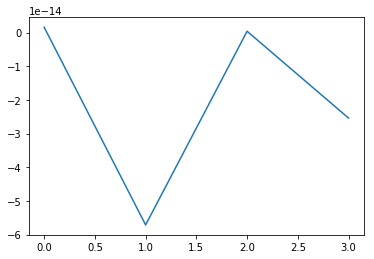

In [239]:
z = []
for i,j in comb:
    z.append(C(psi1,i,j,theta))
print (z)
plt.plot(z)

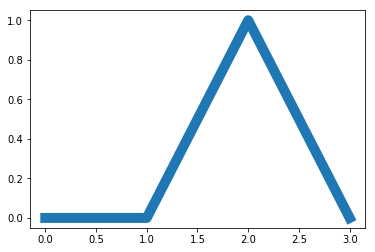

In [188]:
plt.plot(r.x,'o-', lw = 10)
#plt.plot(np.cumsum(r.x),'o--', lw = 10)

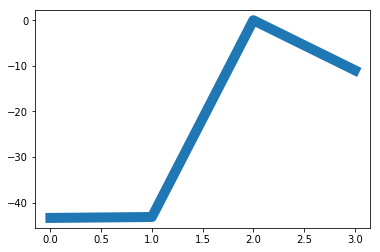

In [189]:
plt.plot(np.log(r.x),'o-', lw = 10)

In [190]:
# Direct minimization approach

In [227]:
def miniminj(psi):
    minimum = 10e10
    for j in optimal:
        for i in suboptimal:
            minimum = min(C(psi,j,i,theta),minimum)
    return -minimum 

In [229]:
psi = np.random.randn(N)
psi = psi/np.sum(psi)
r2 = scipy.optimize.minimize(miniminj,psi, tol= 10e-40, constraints=constraints)
print (r2.fun)
psi2 = r2.x
z = []
for i,j in comb:
    z.append(C(psi2,i,j,theta))
print (z)
#print(psi2)

-10.903228473164027
[11.362627547006442, 14.349967665017024, 10.903228473164027, 10.903228473164065]


In [230]:
z = []
for i,j in comb:
    z.append(C(psi2,i,j,theta))
print (z)
#print(psi2)

[11.362627547006442, 14.349967665017024, 10.903228473164027, 10.903228473164065]


Text(0.5, 0, 'Arm i')

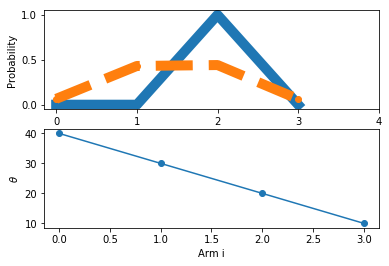

In [231]:
plt.subplot(211)
plt.plot(r.x,'o-', lw = 10)
plt.plot(r2.x,'o--',lw = 10)
plt.xticks(np.arange(5))
plt.xlabel("Arm i")
plt.ylabel("Probability")
#plt.plot(np.cumsum(r.x))
plt.subplot(212)
plt.ylabel("$\\theta$")
plt.plot(theta,'o-')
plt.xlabel("Arm i")

58.659247808164785